## Observations and Insights 

In [ ]:
#Resources
#https://queirozf.com/entries/pandas-dataframe-examples-duplicated-data
#https://https://queirozf.com/archive
#https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
#https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_df = mouse_metadata.merge(study_results, on =['Mouse ID'])
mouse_df = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

#mouse_df.to_csv('cmbmouse.csv')
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dup_mouse_data = (mouse_df.loc[dup_mouse.values, ['Mouse ID', 'Timepoint']])
dup_mouse_ID = dup_mouse_data['Mouse ID'].unique()
print(dup_mouse_ID)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dup_mouse_data = (mouse_df.loc[dup_mouse.values, ['Mouse ID', 'Timepoint']])
dup_mouse_data


,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_cln = mouse_df.drop(mouse_df.loc[mouse_df['Mouse ID'] == 'g989'].index) #, inplace=True)
mouse_df_cln

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_df_cln['Mouse ID'].nunique()

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regm_df = mouse_df_cln.groupby('Drug Regimen')
mean = drug_regm_df[['Tumor Volume (mm3)']].mean().rename(columns = {'Tumor Volume (mm3)': 'Mean'})
median = drug_regm_df[['Tumor Volume (mm3)']].median().rename(columns = {'Tumor Volume (mm3)': 'Median'})
variance = drug_regm_df[['Tumor Volume (mm3)']].var().rename(columns = {'Tumor Volume (mm3)': 'Variance'})
stddev = drug_regm_df[['Tumor Volume (mm3)']].std().rename(columns = {'Tumor Volume (mm3)': 'STD Dev'})
sem = drug_regm_df[['Tumor Volume (mm3)']].sem().rename(columns = {'Tumor Volume (mm3)': 'SEM'})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regm_df = pd.concat([mean, median, variance, stddev, sem], axis = 1)
drug_regm_df
#summary_df = drug_regm_df({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stddev, "SEM": sem})
#summary_df


,Mean,Median,Variance,STD Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_regm2_df= mouse_df_cln.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)','mean'),
                                                        Median = ('Tumor Volume (mm3)','median'),
                                                        Variance = ('Tumor Volume (mm3)','var'),
                                                        STD_Dev = ('Tumor Volume (mm3)','std'),
                                                        SEM = ('Tumor Volume (mm3)','sem'))
drug_regm2_df

,Mean,Median,Variance,STD_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

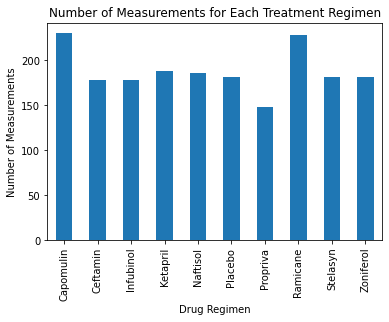

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bchrt_data = mouse_df_cln.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bchrt_plt_data = bchrt_data.plot.bar(rot='vertical',title='Number of Measurements for Each Treatment Regimen')

bchrt_plt_data.set_xlabel("Drug Regimen")
bchrt_plt_data.set_ylabel("Number of Measurements")


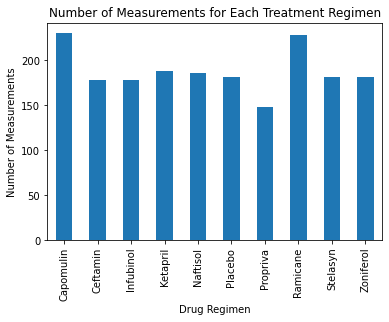

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bchrt_data = mouse_df_cln.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bchrt_plt_data = bchrt_data.plot.bar(rot='vertical',title='Number of Measurements for Each Treatment Regimen')

plt.xdata = bchrt_plt_data.plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements for Each Treatment Regimen')
plt.show()



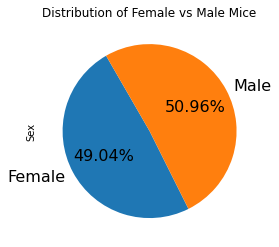

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pgndr = mouse_df_cln.groupby('Sex').count()['Mouse ID']

pie_plot = pgndr.plot.pie(ylabel='Sex',title='Distribution of Female vs Male Mice',startangle = 120,autopct = '%1.2f%%',fontsize=16)

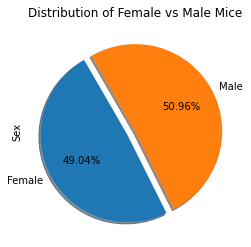

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pgndr = mouse_df_cln.groupby('Sex').count()['Mouse ID']


plt.pie(pgndr, labels = pgndr.index, explode = (0.1, 0),autopct="%1.2f%%", shadow=True, startangle=120)

plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tdrug_lst =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
mouse_df_cln["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


45

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

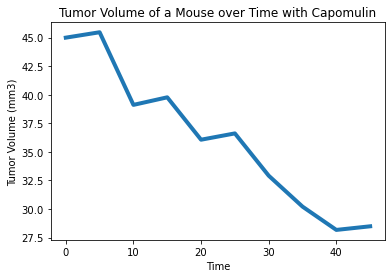

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m_vol = (mouse_df_cln[mouse_df_cln['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'][10:20].to_list())
m_time = (mouse_df_cln[mouse_df_cln['Drug Regimen'] == 'Capomulin']['Timepoint'][10:20].to_list())

plt.plot(m_time, m_vol, linewidth=4)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of a Mouse over Time with Capomulin")
plt.show()

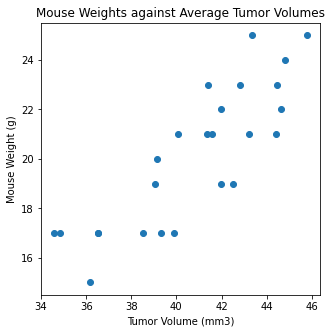

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
m_grp = mouse_df_cln.groupby(["Mouse ID"])
m_list = mouse_df_cln[mouse_df_cln['Drug Regimen'] == 'Capomulin']
m_id = m_list['Mouse ID'].unique()
m_avg_vol = pd.Series([m_grp.get_group(m)['Tumor Volume (mm3)'].mean() for m in m_id])
m_weight = pd.Series([m_grp.get_group(m)['Weight (g)'].sum()/m_grp.get_group(m)['Weight (g)'].count() for m in m_id])

plt.figure(figsize=(5,5))
plt.scatter(m_avg_vol, m_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weights against Average Tumor Volumes")
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
